# ANALYSE DE DONNEES EN PYTHON 

In [101]:
# IMPORTATION DES BIBLIOTHEQUE NECESSAIRE POUR L'ANALYSE 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# CHARGEMENT DU DATASET
data = pd.read_csv('Housing.csv')

EXPLORATION INITIALE DES DONNEES

In [103]:
# FAIRE UNE COPIE COMPLETE DU DATASET
df = data.copy()

In [104]:
# COMPRENDRE LA STRUCTURE DES DONNEES (METADONNEES)
df.shape

(545, 13)

In [105]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [107]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [108]:
df.dtypes.value_counts()

object    7
int64     6
dtype: int64

<Axes: >

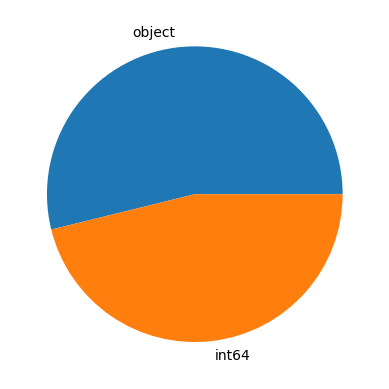

In [109]:
df.dtypes.value_counts().plot.pie()

In [110]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### PRETRAITEMENT DES DONNEES

NETOYAGE DES DONNEES

In [111]:
# Vérification, visualisation et netoyage des valeurs manquantes du dataset
import missingno as mno
import seaborn as sns

In [112]:
df.isna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [113]:
df.isna().sum().sum()

0

<Axes: >

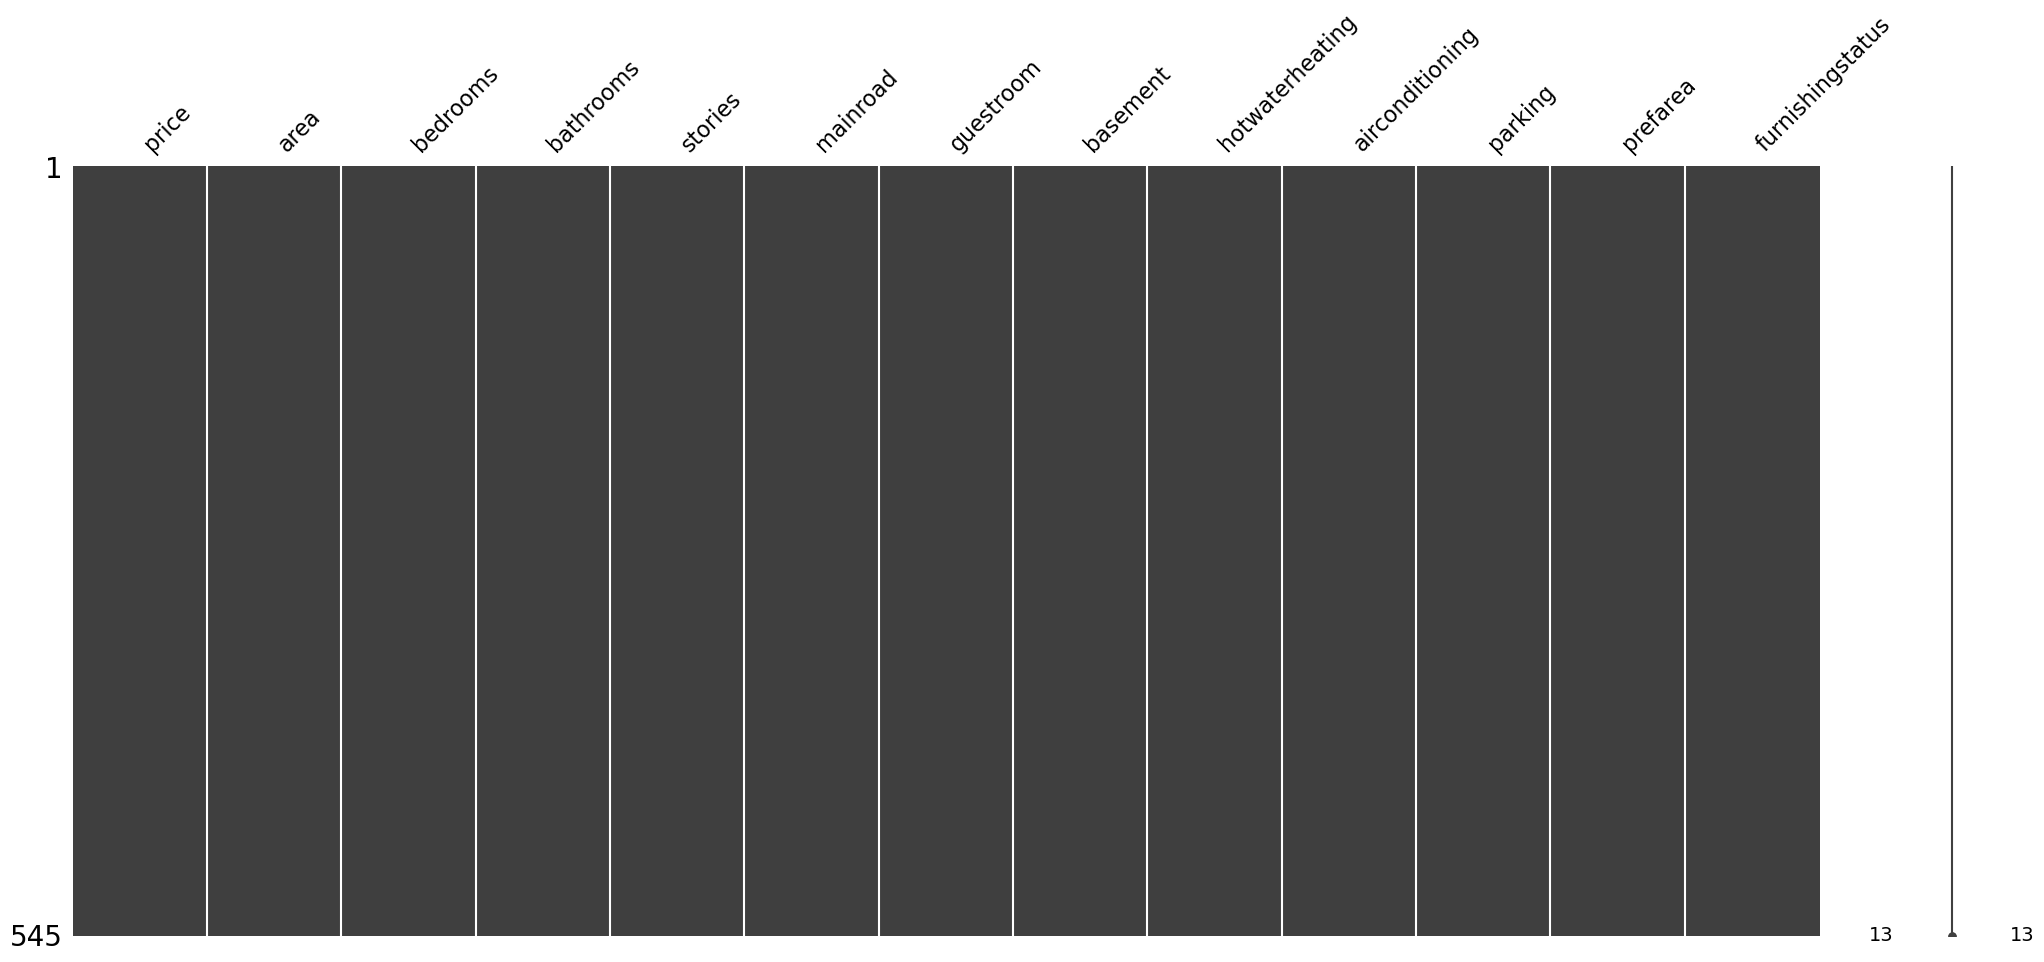

In [114]:
mno.matrix(df)

<Axes: >

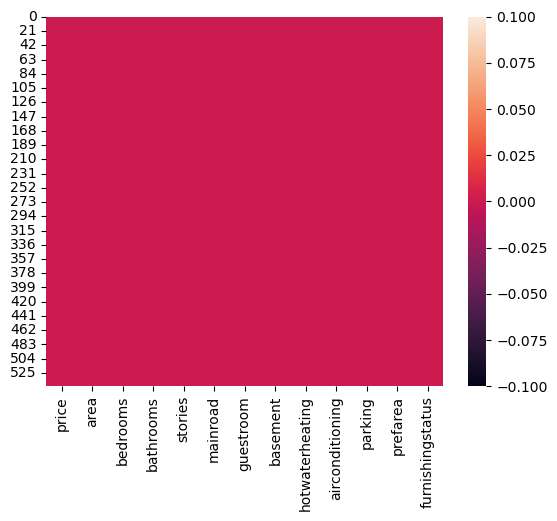

In [115]:
sns.heatmap(df.isna())

#### Conclusion: il n'y a pas de valeurs manquante dans le jeu de données

<Axes: >

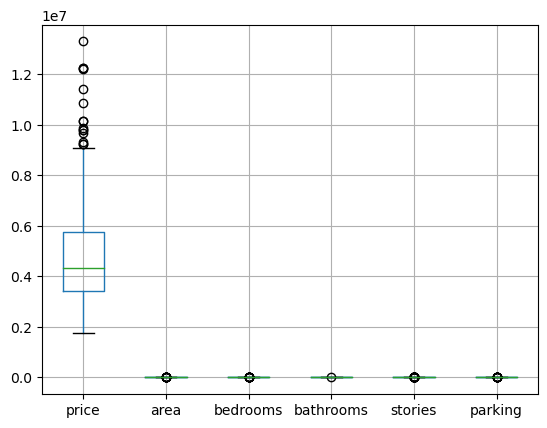

In [116]:
# Vérication, visualisation et netoyage des valeurs aberrantes du dataset
df.boxplot()

<Axes: xlabel='price'>

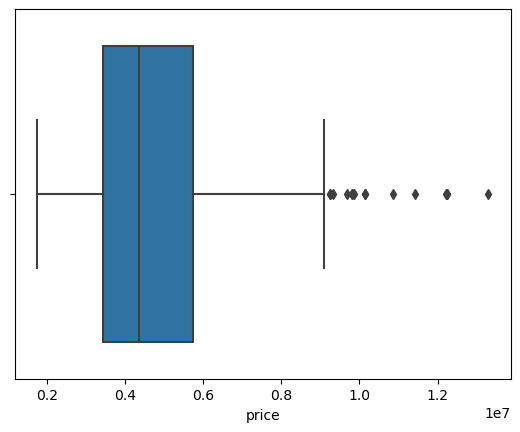

In [117]:
sns.boxplot(x = 'price', data = df)

In [118]:
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outlier

In [119]:
outliers.sum()

15

In [120]:
df['price'].shape

(545,)

In [121]:
outliers = detect_outliers(df['price'])
nbre_outliers = (outliers > 0).sum()
percentage_outliers = (nbre_outliers / df['price'].shape) * 100

In [122]:
percentage_outliers

array([2.75229358])

### ANALYSE EXPLORATOIRE DES DONNEES (EDA)

In [134]:
# Création de l'Histogramme pour la Colonne 'bedrooms'
def histo(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df['bedrooms'], bins=5, edgecolor='black')
    plt.title('Histogramme bedroms')
    plt.xlabel('bedroms')
    plt.ylabel('Frequence')
    plt.grid(True)
    return plt.show()


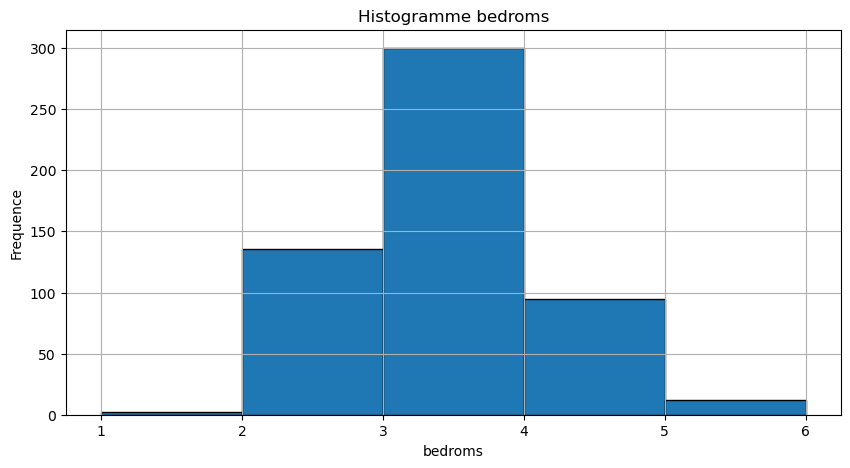

In [135]:
histo(df)

In [125]:
df['bedrooms'].dtypes

dtype('int64')

In [142]:
# Statistique descriptive de la colonne 'bedrooms'
def describe(df):
    moyenne = df['bedrooms'].mean()
    mediane = df['bedrooms'].median()
    mode = df['bedrooms'].value_counts()
    ecartype = df['bedrooms'].std()
    return print (f"La moyenne est:  { moyenne},     La mediane est :  {mediane},     Le mode est : {mode},    L'écartype est:  {ecartype}")

In [143]:
describe(df)

La moyenne est:  2.9651376146788992,     La mediane est :  3.0,     Le mode est : 3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64,    L'écartype est:  0.738063860568575


In [132]:
# Création du Graphique de Dispersion pour area vs price
def nuage_de_point(df):
    plt.figure(figsize=(10, 5))
    plt.scatter(df['area'], df['price'], color='yellow', edgecolors='black')
    plt.title('Graphique de Dispersion - Surface vs Prix')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.grid(True)
    return plt.show()

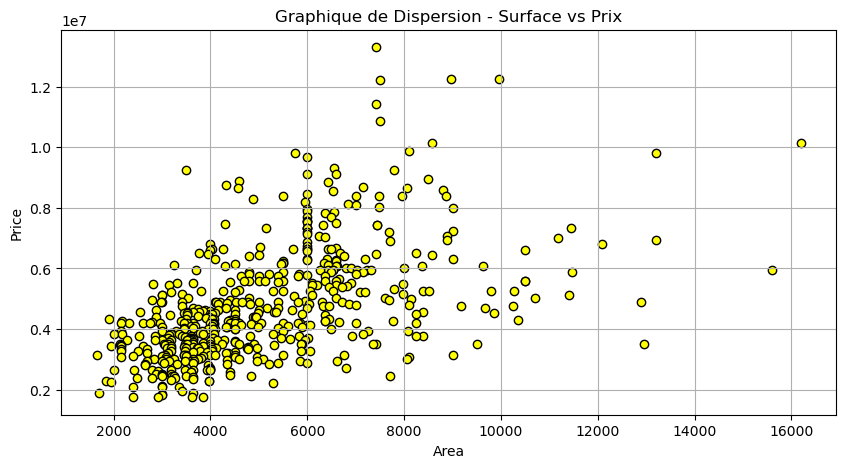

In [133]:
nuage_de_point(df)

In [130]:
# Matrice de corrélation : Comprendre les relations entre les variables.
corr_matrix = df.corr()
corr_matrix

C:\Users\Edme\AppData\Local\Temp\ipykernel_21356\441748642.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


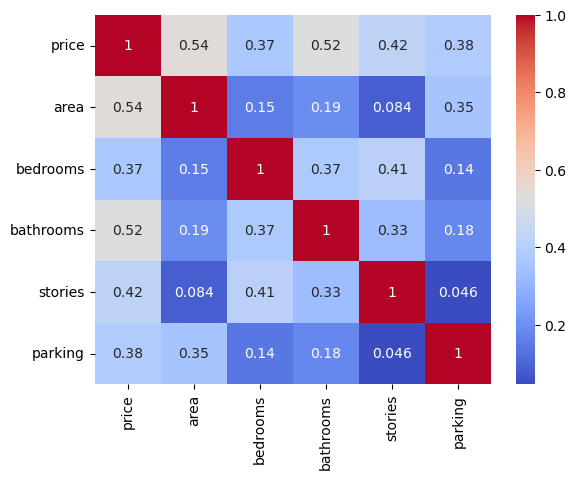

In [131]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()